<a href="https://colab.research.google.com/github/Hitesh1309/Deep-Learning-in-Biometrics-and-Privacy-Security/blob/demo/Face_Recognition_using_CNN_Lab_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Preparation
!unzip -q 'Augmented_Faces_New.zip'
!unzip -q 'Resized Original Faces New.zip'

Archive:  Augmented_Faces_New.zip
   creating: Augmented_Faces_New/Aandeeswaran/
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_0.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_1.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_2.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_3.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_4.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_5.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_6.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_7.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_8.jpg  
  inflating: Augmented_Faces_New/Aandeeswaran/augmented_9.jpg  
   creating: Augmented_Faces_New/Abhiram/
  inflating: Augmented_Faces_New/Abhiram/augmented_0.jpg  
  inflating: Augmented_Faces_New/Abhiram/augmented_1.jpg  
  inflating: Augmented_Faces_New/Abhiram/augmented_2.jpg  
  inflating: Augmented_Faces_New/Abhiram/augmented_3.jpg  
 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
data_path = 'Augmented_Faces_New'
print(len(os.listdir(data_path)))

67


In [ ]:
num_classes = 67

In [ ]:
# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

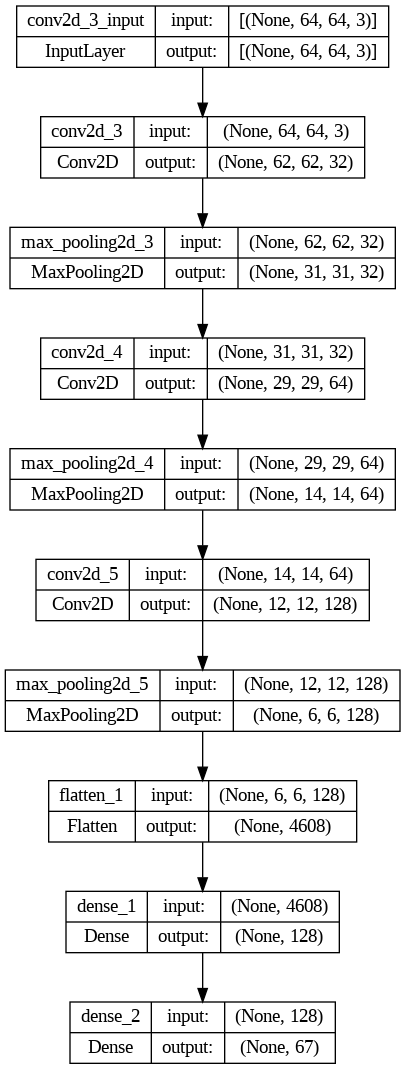

In [ ]:
# Visualize the model architecture
plot_model(model, to_file='model_visualization.png', show_shapes=True)

In [ ]:
# Creating a single list for all the images and their corresponding labels
images = []
labels = []

class_mapping = {}  # Dictionary for mapping folder names to numeric labels
label_counter = 0

for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)

    # Add class name to the mapping dictionary if it's not already present
    if class_name not in class_mapping:
        class_mapping[class_name] = label_counter
        label_counter += 1

    class_label = class_mapping[class_name]

    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))  # Resize the image to your desired size
        images.append(image)
        labels.append(class_label)

In [ ]:
# Converting the list to a numpy array
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Shuffling the dataset to improve the accuracy
random_indices = np.random.permutation(len(images))
images = images[random_indices]
labels = labels[random_indices]

In [ ]:
# Splitting the Numpy array in the ratio of 80:20 ,
#   where 80% of the data is training set and the remaining 20% of the data is testing set
train_images = images[:int(0.8*len(images))]
train_labels = labels[:int(0.8*len(images))]
test_images = images[int(0.8*len(images)):]
test_labels = labels[int(0.8*len(images)):]

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
17/17 [==============================] - 7s 283ms/step - loss: 17.9111 - accuracy: 0.0019 - val_loss: 4.1287 - val_accuracy: 0.0522
Epoch 2/10
17/17 [==============================] - 4s 231ms/step - loss: 4.0569 - accuracy: 0.0485 - val_loss: 3.9618 - val_accuracy: 0.0522
Epoch 3/10
17/17 [==============================] - 5s 278ms/step - loss: 3.6890 - accuracy: 0.1026 - val_loss: 3.9027 - val_accuracy: 0.0597
Epoch 4/10
17/17 [==============================] - 4s 236ms/step - loss: 3.0981 - accuracy: 0.2127 - val_loss: 3.0923 - val_accuracy: 0.2612
Epoch 5/10
17/17 [==============================] - 4s 228ms/step - loss: 2.2868 - accuracy: 0.4440 - val_loss: 2.8384 - val_accuracy: 0.2836
Epoch 6/10
17/17 [==============================] - 5s 274ms/step - loss: 1.6689 - accuracy: 0.5765 - val_loss: 1.7624 - val_accuracy: 0.5448
Epoch 7/10
17/17 [==============================] - 4s 244ms/step - loss: 0.9916 - accuracy: 0.7425 - val_loss: 1.3838 - val_accuracy: 0.6567
Epoch

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc*100,"%")

5/5 [==============================] - 0s 91ms/step - loss: 0.7893 - accuracy: 0.7463
Test Accuracy: 74.6268630027771 %


In [ ]:
# Make predictions
predictions = model.predict(test_images)

5/5 [==============================] - 1s 83ms/step


In [ ]:
print('The Labels of the images are : ')
print('Face_0 to Face_39')
for key,value in class_mapping.items():
  if not key.startswith("Face"):
    print(key)

The Labels of the images are : 
Face_0 to Face_39
Gokul
Robinsha
Saket
Hitesh
Keerthivasan
Dhilipan
Aandeeswaran
Ryan
Kavya
Kathiravan
Umarani
Roshith
Nagasai
Dhivya
Saurabh
Manideep
Samarth
Kavietha
Shajini
Prithviraj
Sasi_Pavan
Abhiram
Vinothini
Sukesh_Babu
Sivakamasundari
Ashwinraj
Parasuraman


Enter the name : Umarani


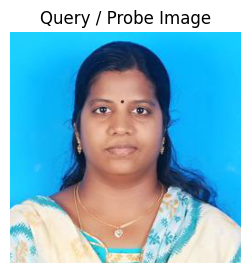

1/1 [==============================] - 0s 27ms/step
Top 5 predicted classes:
Rank 1: Umarani
Rank 2: Sivakamasundari
Rank 3: Robinsha
Rank 4: Keerthivasan
Rank 5: Vinothini


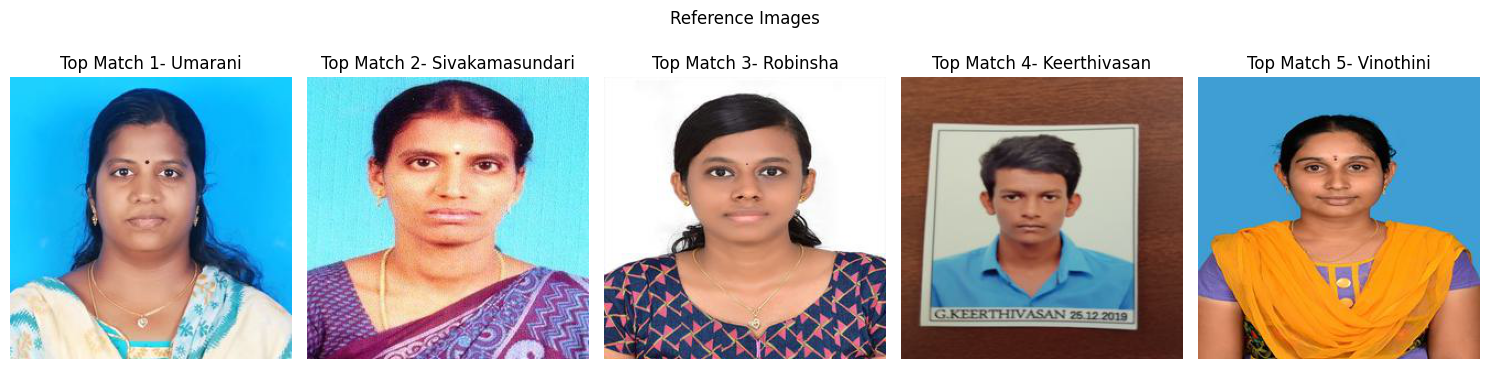

In [ ]:
rank_labels = []
num_output = 5

for i in range(num_output):
    rank_labels.append(f"Top Match {i+1}")

class_name = input("Enter the name : ")  # Replace "class_name" with the actual name of the class
class_label = class_mapping[class_name]  # Replace mapping with the actual mapping dictionary

data_folder = "Resized Original Faces New"  # Path to the data folder containing the images

image_filename = f"{class_name}.jpg"  # Construct the image filename

image_path = os.path.join(data_folder, image_filename)

# Check if the image file exists
if os.path.exists(image_path):
    # Load and plot the image
    image = plt.imread(image_path)
    fig, ax = plt.subplots(figsize=(3,3))

    ax.imshow(image, cmap='gray')
    ax.set_title("Query / Probe Image")
    ax.axis("off")
    plt.show()
else:
    print(f"Image file not found: {image_filename}")


# Find the indices of images belonging to the specified class
class_indices = [i for i, label in enumerate(train_labels) if label == class_label]

if len(class_indices) > 0:
    # Randomly select an index from the available indices
    selected_index = np.random.choice(class_indices)
    selected_image = train_images[selected_index]

    # Print the selected index and the corresponding image
    # print("Selected Index:", selected_index)

    # Get the logits for the query image
    query_logits = model.predict(np.expand_dims(train_images[selected_index], axis=0))

    # Get the indices of the top 5 predicted classes
    top_indices = np.argsort(query_logits)[0][::-1][:num_output]

    # Convert the numeric labels back to the string values
    top_labels = [list(class_mapping.keys())[list(class_mapping.values()).index(label)] for label in top_indices]

    print(f"Top {num_output} predicted classes:")
    for i, label in enumerate(top_labels):
        print(f"Rank {i+1}: {label}")

    num_images = len(top_labels)

    fig, axs = plt.subplots(1, num_images, figsize=(15, 4))
    fig.suptitle("Reference Images")

    # Process each input string in the list
    for i, input_string in enumerate(top_labels):
        image_filename = f"{input_string}.jpg"  # Construct the image filename
        image_path = os.path.join(data_folder, image_filename)

        # Check if the image file exists
        if os.path.exists(image_path):
            # Load and plot the image
            image = plt.imread(image_path)
            ax = axs[i]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"{rank_labels[i]}- {input_string}")
            ax.axis("off")
        else:
            print(f"Image file not found: {image_filename}")

    plt.tight_layout()
    plt.show()

else:
    print("No images found for the specified class.")